In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

from common.utils import Utils
from models.logistic_regressions import LogisticRegression

In [2]:
n_samples = 1000
mean = [5, 9]
cov = [[2.5, 0.8], [0.8, 0.5]]
X_p = np.random.multivariate_normal(mean, cov, n_samples).T
cov = [[3, -1.3], [-1.3, 1.2]]
X_n_1 = np.random.multivariate_normal([11, 2], cov, int(n_samples/2)).T
X_n_2 = np.random.multivariate_normal([5, 1], cov, n_samples-int(n_samples/2)).T
X_n = np.hstack([X_n_1, X_n_2])


def plot_boundary(X_n, X_p, params, ax=None, intercept=0, extras=None):
    """
    Plots the boundary of a sigmoid threshold
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ylim_ub = np.ceil(np.maximum(np.max(X_n[1]), np.max(X_p[1])))
    ylim_lb = np.floor(np.minimum(np.min(X_n[1]), np.min(X_p[1])))
    ax.set_ylim(ylim_lb, ylim_ub)
    xlim_ub = np.ceil(np.maximum(np.max(X_n[0]), np.max(X_p[0])))
    xlim_lb = np.floor(np.minimum(np.min(X_n[0]), np.min(X_p[0])))
    ax.set_xlim(xlim_lb, xlim_ub)

    mesh_lb = np.minimum(xlim_lb, ylim_lb) - 1
    mesh_ub = np.maximum(xlim_ub, ylim_ub) + 1
    tt_x = np.arange(mesh_lb, mesh_ub, 0.1)
    tt_y = np.arange(mesh_lb, mesh_ub, 0.1)
    tt_xx, tt_yy = np.meshgrid(tt_x, tt_y, sparse=False, indexing='xy')
    tt_xy = np.vstack([tt_xx.ravel(), tt_yy.ravel()])
    tt_zz = Utils.sigmoid(np.dot(tt_xy.T, params) + intercept)

    plt.contourf(tt_x, tt_y, tt_zz.reshape(tt_xx.shape), cmap="hot")

    ax.scatter(X_p[0], X_p[1], color="orange")
    ax.scatter(X_n[0], X_n[1], color="green")
    if extras is not None:
        ax.scatter(extras[0], extras[1], color="blue", marker="o")

In [3]:
def compute_loss(X, y, theta, intercept=0, epsilon: float = 1e-5):
    # Loss(w) = -(y_i*log(h_w(x_i))) + (1-y_i)*log(1-h_w(x_i))
    # theta are our parameters w of the Logistic Regression
    #
    batch_size = len(y)
    # Compute the hypothesis h given X and our model parameters theta (and intercept)
    h = Utils.sigmoid(np.dot(X, theta) + intercept)
    # Compute the average (batch-wise) cross-entropy loss
    loss = (1 / batch_size) * (((-y).T @ np.log(h + epsilon)) - ((1 - y).T @ np.log(1 - h + epsilon)))
    return loss

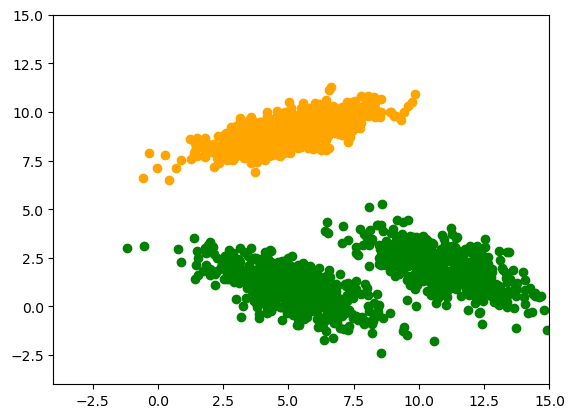

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_p[0], X_p[1], color="orange")
ax.scatter(X_n[0], X_n[1], color="green")
ax.set_ylim(-4, 15)
ax.set_xlim(-4, 15)
plt.show()

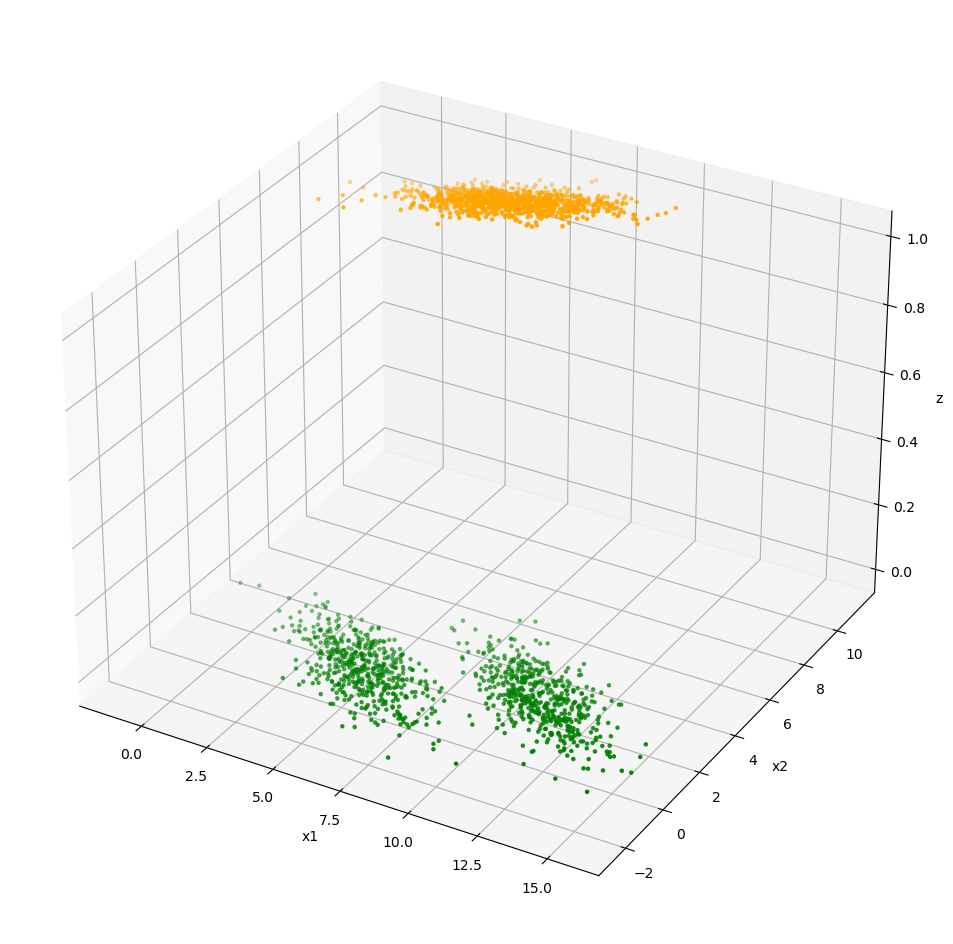

In [5]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("z")
ax.scatter(X_p[0], X_p[1], np.ones_like(X_p[0]), color="orange", marker=".")
ax.scatter(X_n[0], X_n[1], np.zeros_like(X_n[0]), color="green", marker=".")
plt.show()

In [6]:
XY_p = np.vstack([X_p, np.ones_like(X_p[0])])
XY_n = np.vstack([X_n, np.zeros_like(X_n[0])])
XY = np.hstack([XY_n, XY_p])
data_XY = np.copy(XY).T
np.random.shuffle(data_XY)
data_train = data_XY[:1600]
data_test = data_XY[:400]

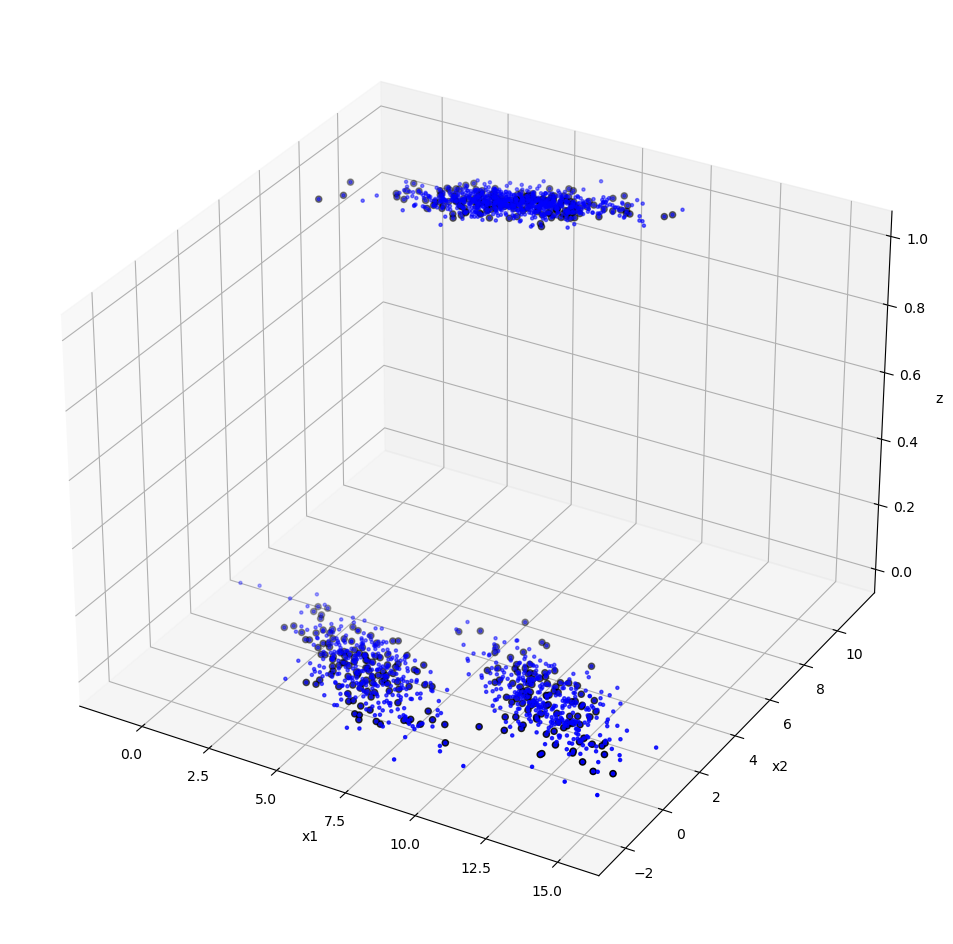

In [7]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("z")
ax.scatter(data_train[:,0], data_train[:,1], data_train[:,2], color="blue", marker=".")
ax.scatter(data_test[:,0], data_test[:,1], data_test[:,2], color="black", marker="o")
plt.show()

In [23]:
model = LogisticRegression()
model.learn(data_train[:,:2], data_train[:,2], learning_rate=0.001, iterations=10)
pred_y = model.infer(data_test[:,:2])
model.weights

array([-1.0484127,  1.1274598])

In [24]:
compute_loss(data_test[:,:2], data_test[:,2], model.weights)

0.045335672309934946

In [25]:
print('Accuracy: %2.2f %%' % (100. * metrics.accuracy_score(data_test[:, 2], pred_y)))

Accuracy: 1.00 %


In [11]:
data_test[:, 2].shape

(400,)

In [12]:
pred_y.shape

(400,)